In [1]:
using Pkg, Revise
Pkg.activate("..")
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot

  Activating new project at `C:\Users\sutha\OneDrive\Documents\Kuliah\Skripsi\ClapeyronThermo Clapeyron.jl master examples`


PyPlot

In [3]:
components = [("water"), ("glycine", ["NH2"=>1, "CH2"=>1, "COOH"=>1])]

model = CompositeModel(components;
                       fluid = SAFTgammaMie,
                       solid = SolidHfus)

Composite Model with 2 components:
 "water"
 "glycine"
Solid Model: SolidHfus("water", "glycine")
Fluid Model: SAFTgammaMie{BasicIdeal, Float64}("water", "glycine")

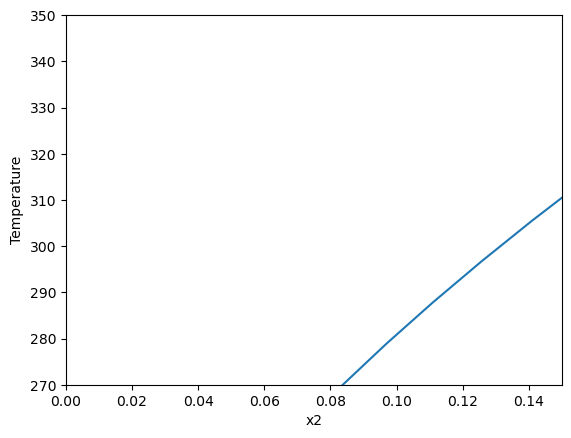

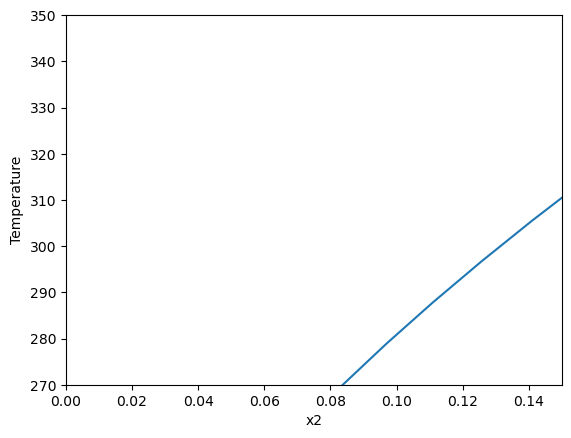

In [4]:
using Clapeyron

T = LinRange(270.,350.,10)
p = 100000 

s = zeros(length(T))

for i in 1:length(T)
    s[i] = sle_solubility(model,p,T[i],[1.,1.];solute=["glycine"])[2]
end

plt.clf()
plt.plot(s,T)
plt.xlabel("x2")
plt.ylabel("Temperature")
plt.xlim(0,0.15)
plt.ylim(270,350)
display(plt.gcf())